# Practica 2

**Objetivo:** A partir del [corpus proporcionado](./../99_corpus/corpusML.txt) realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003).

In [1]:
from re import sub
from unicodedata import normalize
from nltk.stem.snowball import SpanishStemmer
from sklearn.model_selection import train_test_split
from itertools import chain
from collections import Counter,defaultdict
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd

# Definimos funcion de apoyo para imprimir ejemplos de los corpus
def ejemplos(msg, collection, n_elements):
    print(msg)
    for element in collection[:n_elements]:
        print(element)

## 1. Limpiar los textos y aplicar stemming a las palabras.

In [2]:
# Abrir el documento
document = './../99_corpus/corpusML.txt'
text = open(document,'r',encoding='utf-8').read()

In [3]:
# Limpiamos el documento
text_clean = ""
lines = []

for line in text.split("\n"):
    # Eliminamos caracteres compuestos y pasamos a minusculas
    line = normalize('NFKC', line).lower()
    # Eliminamos extensiones y numeros
    line = sub(r"\\.*|{.*}|\\|\[.*\]|[!-@[-`{-~]", ' ', line)
    # Eliminamos signos de puntuacion
    line = sub(r"[^\w]", " ", line)
    # Eliminamos saltos de linea
    line = " ".join(line.split())
    # Si la linea no esta vacia la añadimos al texto limpio
    if line:
        lines.append(line)
        
text_clean += " ".join(lines)
text_clean = text_clean.split()

ejemplos("### Lineas de ejemplo ###\n", lines, 5)

### Lineas de ejemplo ###

comencé a trabajar y me pegaron me maltrataron con chicote
mis patrones me pegaron porque no me quería apurar porque era flojo
por eso me habían pegado
cuando me pegaban ya entonces me quitaba
pues entonces no quise trabajar


In [4]:
# Aplicamos Stemming a los tokens limpios

# Debido a que el corpus se encuentra en español, utilizaremos el stemmer de NLTK para español.
stemmer = SpanishStemmer()
stems = []
for line in lines:
    stems.append([stemmer.stem(word) for word in line.split(" ")])
    
ejemplos("### Lineas de ejemplo ###\n", stems, 10)

### Lineas de ejemplo ###

['comenc', 'a', 'trabaj', 'y', 'me', 'peg', 'me', 'maltrat', 'con', 'chicot']
['mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj']
['por', 'eso', 'me', 'hab', 'peg']
['cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit']
['pues', 'entonc', 'no', 'quis', 'trabaj']
['ya', 'no', 'quis', 'estar', 'com', 'me', 'peg']
['despues', 'ya', 'estuv', 'nomas', 'en', 'mi', 'cas']
['fui', 'a', 'junt', 'cac', 'de', 'caball']
['fui', 'a', 'junt', 'caquit', 'de', 'caball']
['se', 'me', 'avent', 'las', 'culebr']


In [5]:
# Separación del corpus en prueba (70%) y evaluación (30%)
train_corpus, eval_corpus = train_test_split(stems, test_size=0.3)

## 2. Insertar símbolos de inicio y final de cadena.

In [6]:
# Definimos los simbolos
BOS = '<BOS>'
EOS = '<EOS>'
UNK = '<UNK>'

In [7]:
# Definamos una función para sustituir los hapax, esta funcion recibe un corpus
def replace_hapax(corpus):
    # Obtenemos las frecuencias de las palabras del corpus
    freqs = Counter( chain(*[' '.join(sent).split() for sent in corpus]) )

    # Sustituimos los hápax por UNK en las palabras con frecuencia = 1
    corpus_unk = []

    for line in corpus:
        new_line = []
        for word in line:
            # Si la frecuencia de la palabra = 1, es un hapáx
            if freqs[word] == 1:
                new_line.append(UNK)
            # Si no, añadimos la palabra original
            else:
                new_line.append(word)
        corpus_unk.append(new_line)
    return corpus_unk

In [8]:
# Sustituimos los hápax en los corpus

corpus_unk = []
corpus_unk = replace_hapax(train_corpus)
ejemplos("### Lineas de ejemplo con simbolos <UNK> ###", corpus_unk, 10)

### Lineas de ejemplo con simbolos <UNK> ###
['se', 'le', 'termin', 'de', '<UNK>']
['las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>']
['le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit']
['cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr']
['hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm']
['solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit']
['he', 'ven', 'he', 'camin', 'medi', '<UNK>']
['no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic']
['o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>']
['pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez']


In [9]:
# Definamos una función para insertar los BOS y EOS
def insert_simbols_of_sentence(corpus):
    corpus_w_simbols = [ [BOS] + line + [EOS] for line in corpus ]
    return corpus_w_simbols

In [10]:
# Insertamos BOS y EOS
corpus_w_simbols = []
corpus_w_simbols = insert_simbols_of_sentence(corpus_unk)
ejemplos(" ### Lineas de ejemplo del corpus don simbolos ###", corpus_w_simbols, 10)

 ### Lineas de ejemplo del corpus don simbolos ###
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']
['<BOS>', 'solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit', '<EOS>']
['<BOS>', 'he', 'ven', 'he', 'camin', 'medi', '<UNK>', '<EOS>']
['<BOS>', 'no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic', '<EOS>']
['<BOS>', 'o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez', '<EOS>']


## 3. Obtener los bigramas que aparecen en el texto (indexar numéricamente).

In [11]:
# Definamos una función para indexar numericamente
def corpus2index(corpus):
    # Creamos un diccionario para los stems
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)

    # Creamos el corpus con sus indices
    corpus_ids = [[vocab[word] for word in line] for line in corpus]
    return corpus_ids, vocab

# Definamos una funcion para obtener el diccionario de indice:palabra
def dicKeyWord(vocab):
    return { idx: w for w,idx in vocab.items()}

# Definamos una funcion para obtener el diccionario de palabra:indice
def dicWordKey(vocab):
    return { w: idx for w,idx in vocab.items()}

In [12]:
# Indexamos numericamente los stems

corpus_ids, corpus_vocab = corpus2index(corpus_w_simbols)
ejemplos("Oraciones en corpus con simbolos", corpus_w_simbols, 10)
ejemplos("\nPalabras en indexadas", corpus_ids, 10)

# Creamos los diccionarios key:word para recuperar posteriormente
dic_kw_train = dicKeyWord(corpus_vocab)
# Creamos los diccionarios word:key para recuperar posteriormente
dic_wk_train = dicWordKey(corpus_vocab)

Oraciones en corpus con simbolos
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']
['<BOS>', 'solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit', '<EOS>']
['<BOS>', 'he', 'ven', 'he', 'camin', 'medi', '<UNK>', '<EOS>']
['<BOS>', 'no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic', '<EOS>']
['<BOS>', 'o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez', '<EOS>']

Palabras en indexadas
[0, 1, 2, 3, 4, 5, 6]
[0, 7, 5, 8, 7, 9, 8, 10, 5, 11, 8, 5, 6]
[0, 2, 12, 2, 13, 8, 14, 15, 16, 6]
[0, 17, 18, 19, 20

In [13]:
# Definamos una función para crear los bigrama
def corpus2bigrams(corpus):
    bigrams = list(chain(*[zip(cad,cad[1:]) for cad in corpus]))
    return bigrams

In [14]:
# Obtencion de los bigramas
bigrams = []
bigrams = corpus2bigrams(corpus_ids)
print("Número de bigramas:", len(bigrams))
print("\nEjemplos de bigramas\n", bigrams[:50])

Número de bigramas: 6858

Ejemplos de bigramas
 [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (0, 7), (7, 5), (5, 8), (8, 7), (7, 9), (9, 8), (8, 10), (10, 5), (5, 11), (11, 8), (8, 5), (5, 6), (0, 2), (2, 12), (12, 2), (2, 13), (13, 8), (8, 14), (14, 15), (15, 16), (16, 6), (0, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 8), (8, 28), (28, 29), (29, 6), (0, 30), (30, 2), (2, 31), (31, 32), (32, 21), (21, 2), (2, 33), (33, 34)]


## 4. Entrenar con los bigramas la red neuronal y obtener los valores para los hiperparámetros. Tomar de 100 unidades para la primera capa oculta (capa lineal) y 300 para la segunda capa oculta (capa con tanh).`

In [66]:
class Bengio:
    # Constructor del objeto
    def __init__(self, bigrams, T, d, m, n, N):
        self.bigrams = bigrams
        self.T = T    # Numero de iteraciones
        self.d = d    # Dimension de los embeddings
        self.m = m    # Numero de unidades en la capa oculta
        self.n = n    # Rango de aprendizaje
        self.N = N    # Tamaño del vocabulario
    
    # Inicializamos parametros del modelo
    def initialize_params(self):
        # Matriz de representacion lineal en la primera capa oculta, C ∈ R^(d×N)
        self.C = np.random.random((self.d, self.N))/np.sqrt(self.N)
        # Matriz de pesos en la segunda capa oculta, W ∈ R^(m×d)
        self.W = np.random.random((self.m, self.d))/np.sqrt(self.d)
        # Bias, b ∈ R^m
        self.b = np.random.random(self.m)
        # Matriz de pesos en la capa de salida, U ∈ R^(N×m)
        self.U = np.random.random((self.N, self.m))/np.sqrt(self.m)
        # Bias, c ∈ R^m
        self.c = np.random.random(self.N)
        # Riesgo
        self.R = []
        self.R_it = 0
    
    # Definimos los pasos de forward
    def forward(self, i_x):
        # Capa de embedding
        c_i = self.C[:,i_x]
        # Capa oculta
        h_i = np.tanh(np.dot(self.W, c_i) + self.b)
        # Capa de salida (Softmax)
        # -> Pre-activacion
        a_i = np.dot(self.U, h_i) + self.c
        # -> Activacion
        e_a = np.exp(a_i - a_i.max())
        p_wk_wi = e_a / e_a.sum()
        
        return (p_wk_wi, h_i)
    
    # Definimos la funcion de riesgo
    def risk(self, p_wk_wi, i_y):
        # Entropia cruzada
        self.R_it -= np.log(p_wk_wi[i_y].sum())
    
    # Definimos la funcion para guardar la entropia al final de la iteracion
    def saveRisk(self):
        self.R.append(self.R_it)
    
    # Definimios la funcion para obtener el historial de la entropia cruzada
    def getRisk(self):
        return self.R

    # Definimos los pasos de backward (backpropagation)
    def backward(self, i_y, p_wk_wi, h_i):
        # Capa de salida
        d_out = np.array(p_wk_wi, copy=True) 
        d_out[i_y] -= 1
        # Capa oculta
        d_h = (1 - (h_i*h_i)) * np.dot(d_out.T, self.U)
        # Capa de embedding
        d_c = np.dot(d_h.T, self.W)
        
        return (d_out, d_h, d_c)
    
    # Definimos la actualización de pesos (gradiente descendente)
    def updateWeights(self, d_out, h_i, d_h, d_c, i_x):
        # Capa de salida
        self.U -= self.n * np.outer(d_out, h_i)
        # Capa oculta
        self.W -= self.n * np.outer(d_h, self.C[:, i_x])
        self.c -= self.n * d_out
        #self.c -= self.n * d_h
        # Capa de embedding
        self.C[:, i_x] -=  self.n * d_c
        self.b -= self.n * d_h
        #self.b -= self.n * d_c
    
    # Definimos el entrenamiento
    def train(self):
        for it in range(0, self.T):
            self.R_it = 0
            for pair in self.bigrams:
                # Separamos el bigrama en la palabra y la clase
                i_x = pair[0]
                i_y = pair[1]
                # Forward
                p_wk_wi, h_i = self.forward(i_x)
                # Funcion de riesgo
                self.risk(p_wk_wi, i_y)
                # Backward
                d_out, d_h, d_c = self.backward(i_y, p_wk_wi, h_i)
                # Actualizacion de pesos
                self.updateWeights(d_out, h_i, d_h, d_c, i_x)
            # Guardamos el historial de la entropia cruzada
            self.saveRisk()
            print("Epoch: ", it, "\tEntropia cruzada: ", self.R_it)
        print("### Ha terminado el entrenamiento ###")
    
    # Definimos funcion para obtener la entropia de una frase
    def entropy_phrase(self, sentence):
        entropy = 0
        for pair in sentence:
            i_x = pair[0]
            i_y = pair[1]
            p_wk_wi, h_i = self.forward(i_x)
            entropy -= np.log(p_wk_wi[i_y].sum())
        return entropy
    
    # Definimos funcion para la siguiente palabra
    def predict(self, i_x):
        return np.argmax(self.forward(i_x)[0])

In [52]:
# Definimos hiperparametros de la red
T = 10    # Numero de iteraciones
d = 100    # Dimension de los embeddings
m = 300    # Numero de unidades en la capa oculta
n = 0.1    # Rango de aprendizaje
N = len(corpus_vocab) # Tamaño del vocabulario

print("Tamaño del vocabulario: ", N)

Tamaño del vocabulario:  503


In [67]:
# Creamos objeto del modelo y lo entrenamos
modelo = Bengio(bigrams, T, d, m, n, N)
modelo.initialize_params()
modelo.train()

Epoch:  0 	Entropia cruzada:  33645.254668347676
Epoch:  1 	Entropia cruzada:  30860.698521577317
Epoch:  2 	Entropia cruzada:  29660.353549034222
Epoch:  3 	Entropia cruzada:  28698.07257177817
Epoch:  4 	Entropia cruzada:  27897.6779450702
Epoch:  5 	Entropia cruzada:  27257.786329859595
Epoch:  6 	Entropia cruzada:  26782.399054987396
Epoch:  7 	Entropia cruzada:  26429.813923917714
Epoch:  8 	Entropia cruzada:  26187.4800068071
Epoch:  9 	Entropia cruzada:  26051.6697514551
### Ha terminado el entrenamiento ###


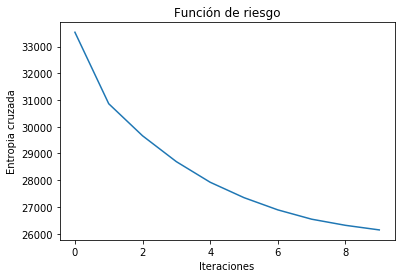

In [54]:
# Vemos como se fue ajustando la funcion de riesgo
plt.plot(modelo.getRisk())
plt.xlabel("Iteraciones")
plt.ylabel("Entropia cruzada")
plt.title("Función de riesgo")
plt.show()

## 5. Obtener las matrices A y Π a partir de las salidas de la red neuronal (probabilidad Softmax).

Modelo de lenguaje μ = (Σ,A,Π)

Σ es un conjunto de símbolos o vocabulario

A = (a_ij) = p(wj|wi) son las probabilidades de transicion de los 
bigramas

Π = (πi) = p(wi) son las probabilidades iniciales.

In [55]:
# Numero de tipos sin contar las etiqeutas BOS y EOS
n_tipos = N

# La matriz A es de NxN+1, los renglones consideran EOS
A = np.zeros((n_tipos,n_tipos+1))
print("Matriz A, tamaño ", A.shape)

# Pi es del tamaño de los tipos
Pi = np.zeros(n_tipos)
print("Matriz Pi, tamaño ", Pi.shape)

Matriz A, tamaño  (503, 504)
Matriz Pi, tamaño  (503,)


In [56]:
# Calculamos las matrices
for bigram in bigrams:
    #Se llena el tensor de transiciones con frecuencias
    if dic_kw_train[bigram[0]] != BOS:
        A[bigram] = modelo.forward(bigram[0])[0][bigram[0]]
    # Se onbtienen las frecuencias de iniciales
    elif dic_kw_train[bigram[0]] == BOS and dic_kw_train[bigram[1]] != EOS:
        Pi[bigram[1]] = modelo.forward(bigram[1])[0][bigram[1]]

In [57]:
# Visualicemos la matriz A
print(A)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00481152 ... 0.         0.         0.        ]
 [0.         0.00019676 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


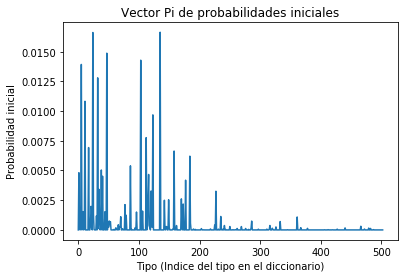

[0.00000000e+00 4.81152026e-03 1.96755467e-04 0.00000000e+00
 2.90242477e-04 1.39238156e-02 0.00000000e+00 8.57048128e-04
 1.53492892e-03 0.00000000e+00 3.53976341e-04 1.08253378e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.93046243e-03 0.00000000e+00 0.00000000e+00
 3.06443757e-04 1.98188313e-03 1.73772972e-03 0.00000000e+00
 1.66116195e-02 1.32539829e-03 2.81952891e-05 2.07550807e-06
 0.00000000e+00 0.00000000e+00 1.18359050e-03 0.00000000e+00
 1.27963708e-02 1.19989473e-04 3.41606273e-03 1.22230584e-03
 0.00000000e+00 1.53243883e-04 5.04228510e-03 0.00000000e+00
 4.52020831e-03 0.00000000e+00 0.00000000e+00 1.85606412e-05
 1.52915482e-03 0.00000000e+00 0.00000000e+00 1.48715253e-02
 0.00000000e+00 6.08225667e-04 2.22799394e-04 7.54141292e-04
 4.47060438e-04 6.97065581e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.03787362e-07 0.00000000e+00 4.36339856e-05
 0.00000000e+00 0.00000000e+00 1.80709755e-04 2.30788082e-05
 2.43003810e-05 0.000000

In [58]:
# Veamos los valores de Pi
plt.plot(Pi)
plt.xlabel("Tipo (Indice del tipo en el diccionario)")
plt.ylabel("Probabilidad inicial")
plt.title("Vector Pi de probabilidades iniciales")
plt.show()

print(Pi)

## 6. Evaluar el modelo (con Entropía).

In [113]:
entropy_phrase = 0
cont = 0

for line in eval_corpus:
    # Obtenemos los indices de las palabras de evaluacion
    # Las palabras que no esten en el diccionario  las trataremos como UNK
    ids_tmp = []
    for word in line:
        ids_tmp.append(dic_wk_train.get(word, dic_wk_train.get(UNK)))
    
    # Obtenemos los bigramas de esta sentencia
    bigrams_tmp = []
    bigrams_tmp = list(zip(ids_tmp, ids_tmp[1:]))
    
    # Obtenemos la entropia de la frase
    entropy_phrase += modelo.entropy_phrase(bigrams_tmp)
    
    if (cont%100) == 0:
        print("### Linea ", cont+0, " ###")
        print(line)
        print(idx_tmp)
        print(bigrams_tmp)
        print("\nPalabras predecidas")
        predicts = []
        for idx in ids_tmp:
            predict = dic_kw_train[modelo.predict(idx)]
            current = dic_kw_train[idx]
            print(current, " -> ", predict)
        print("\n")
        
    cont+=1

entropy_phrase /= len(eval_corpus)
print("Entropia del modelo evaluado: ", entropy_phrase)

### Linea  0  ###
['pues', 'asi', 'fue', 'mi', 'pasion']
[69, 40, 298, 69, 40, 369, 34, 25, 124, 90]
[(24, 49), (49, 63), (63, 40), (40, 5)]

Palabras predecidas
pues  ->  van
asi  ->  pues
fue  ->  <EOS>
mi  ->  <UNK>
<UNK>  ->  <EOS>


### Linea  100  ###
['entonc', 'cuand', 'lo', 'hab', 'ido', 'a', 'tra', 'lueg', 'este', 'hij', 'ya', 'no', 'te', 'veng', 'ahor', 'ya', 'te', 'qued', 'en', 'tu', 'cas']
[69, 40, 298, 69, 40, 369, 34, 25, 124, 90]
[(32, 17), (17, 47), (47, 149), (149, 186), (186, 8), (8, 333), (333, 86), (86, 106), (106, 87), (87, 112), (112, 34), (34, 35), (35, 5), (5, 243), (243, 112), (112, 35), (35, 89), (89, 21), (21, 10), (10, 90)]

Palabras predecidas
entonc  ->  <EOS>
cuand  ->  se
lo  ->  que
hab  ->  que
ido  ->  a
a  ->  compr
tra  ->  una
lueg  ->  <EOS>
este  ->  <UNK>
hij  ->  no
ya  ->  troz
no  ->  tien
te  ->  compr
<UNK>  ->  <EOS>
ahor  ->  nomas
ya  ->  troz
te  ->  compr
qued  ->  pues
en  ->  tod
tu  ->  abuel
cas  ->  <EOS>


### Linea  200  ###
['

In [123]:
# Generemos alguno de texto con una frase introducidad

for line in eval_corpus[:5]:
    # Obtenemos los indices de las palabras de evaluacion
    # Las palabras que no esten en el diccionario  las trataremos como UNK
    ids_tmp = []
    for word in line:
        ids_tmp.append(dic_wk_train.get(word, dic_wk_train.get(UNK)))
    
    print("###  ###")
    print("\nLinea inicial")
    print(line)
    print(idx_tmp)
    print(bigrams_tmp)
    # Tomamos la palabra inicial de esta linea y obtenemos las siguientes 10
    print("\nTexto generado (10 palabras a partir de una inicial)")
    current = ids_tmp[0]
    predicts = []
    predicts.append(line[0])
    for idx in range(0,100):
        next_w = modelo.predict(current)
        predicts.append(dic_kw_train[next_w])
        current = next_w
        if current == dic_wk_train[EOS]:
            break
    print(predicts)
    print("\n")

###  ###

Linea inicial
['pues', 'asi', 'fue', 'mi', 'pasion']
[69, 40, 298, 69, 40, 369, 34, 25, 124, 90]
[(69, 40), (40, 298), (298, 69), (69, 40), (40, 369), (369, 34), (34, 25), (25, 124), (124, 90)]

Texto generado (10 palabras a partir de una inicial)
['pues', 'van', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']


###  ###

Linea inicial
['tal', 'vez', 'lo', 'hub', 'mord', 'el', 'animalit', 'de', 'dios']
[69, 40, 298, 69, 40, 369, 34, 25, 124, 90]
[(69, 40), (40, 298), (298, 69), (69, 40), (40, 369), (369, 34), (34, 25), (25, 124), (124, 90)]

Texto generado (10 palabras a partir de una inicial)
['tal', 'vez', '<EOS>']


###  ###

Linea inicial
['ten', 'un', 'pedaz', 'per', 'pues', 'hab', 'ido', 'a', 'trabaj', 'y', 'nos', 'lo', 'han', 'quit']
[69, 40, 298, 69, 40, 369, 34, 25, 124, 90]
[(69, 40), (40, 298), (298, 69), (69, 40), (40, 369), (369, 34), (34, 25), (25, 124), (124, 90)]

Texto generado (10 palabras a partir de una inicial)
['ten', 'dos', '<EOS>']


###  ###

Linea inic

## 7. Calcular la probabilidad de las siguientes oraciones:
   - Nos bañamos con agua caliente
   - El animalito le olía la cabeza
   - Pascuala ordeñaba las vacas

In [ ]:
# Definamos funcion que calcula la probabilidad de una frase
# Tomamos como apoyo las matrices A y PI

def prob_phrase(bigrams, A, Pi):
    prob = Pi[bigrams[0][0]]
    return prob